In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error
from xgboost import plot_importance,plot_tree

In [49]:
df=pd.read_csv('Gujrat 2022-23.newlyedited2.csv')

In [50]:
df.head()

,DateTime,Date,Time,Power_MW
0,04-01-2022 00:00,4-1-2022,00:00,90.93
1,04-01-2022 00:15,4-1-2022,00:15,94.97
2,04-01-2022 00:30,4-1-2022,00:30,108.82
3,04-01-2022 00:45,4-1-2022,00:45,112.58
4,04-01-2022 01:00,4-1-2022,01:00,105.05


In [50]:
df.head()

,DateTime,Date,Time,Power_MW
0,04-01-2022 00:00,4-1-2022,00:00,90.93
1,04-01-2022 00:15,4-1-2022,00:15,94.97
2,04-01-2022 00:30,4-1-2022,00:30,108.82
3,04-01-2022 00:45,4-1-2022,00:45,112.58
4,04-01-2022 01:00,4-1-2022,01:00,105.05


In [51]:
df.tail()

,DateTime,Date,Time,Power_MW
35035,03-31-2023 22:45,3-31-2023,22:45,120.56
35036,03-31-2023 23:00,3-31-2023,23:00,120.05
35037,03-31-2023 23:15,3-31-2023,23:15,110.98
35038,03-31-2023 23:30,3-31-2023,23:30,102.69
35039,03-31-2023 23:45,3-31-2023,23:45,107.03


In [52]:
df = df.set_index('DateTime')

In [89]:
df.index

Index(['04-01-2022 00:00', '04-01-2022 00:15', '04-01-2022 00:30',
       '04-01-2022 00:45', '04-01-2022 01:00', '04-01-2022 01:15',
       '04-01-2022 01:30', '04-01-2022 01:45', '04-01-2022 02:00',
       '04-01-2022 02:15',
       ...
       '03-31-2023 21:30', '03-31-2023 21:45', '03-31-2023 22:00',
       '03-31-2023 22:15', '03-31-2023 22:30', '03-31-2023 22:45',
       '03-31-2023 23:00', '03-31-2023 23:15', '03-31-2023 23:30',
       '03-31-2023 23:45'],
      dtype='object', name='DateTime', length=35040)

In [91]:
df.index = pd.to_datetime(df.index)

In [92]:
df.index

DatetimeIndex(['2022-04-01 00:00:00', '2022-04-01 00:15:00',
               '2022-04-01 00:30:00', '2022-04-01 00:45:00',
               '2022-04-01 01:00:00', '2022-04-01 01:15:00',
               '2022-04-01 01:30:00', '2022-04-01 01:45:00',
               '2022-04-01 02:00:00', '2022-04-01 02:15:00',
               ...
               '2023-03-31 21:30:00', '2023-03-31 21:45:00',
               '2023-03-31 22:00:00', '2023-03-31 22:15:00',
               '2023-03-31 22:30:00', '2023-03-31 22:45:00',
               '2023-03-31 23:00:00', '2023-03-31 23:15:00',
               '2023-03-31 23:30:00', '2023-03-31 23:45:00'],
              dtype='datetime64[ns]', name='DateTime', length=35040, freq=None)

In [74]:
df['datetime']=df.index

In [75]:
df

,Date,Time,Power_MW,datetime
DateTime,,,,
04-01-2022 00:00,4-1-2022,00:00,90.93,04-01-2022 00:00
04-01-2022 00:15,4-1-2022,00:15,94.97,04-01-2022 00:15
04-01-2022 00:30,4-1-2022,00:30,108.82,04-01-2022 00:30
04-01-2022 00:45,4-1-2022,00:45,112.58,04-01-2022 00:45
04-01-2022 01:00,4-1-2022,01:00,105.05,04-01-2022 01:00
...,...,...,...,...
03-31-2023 22:45,3-31-2023,22:45,120.56,03-31-2023 22:45
03-31-2023 23:00,3-31-2023,23:00,120.05,03-31-2023 23:00
03-31-2023 23:15,3-31-2023,23:15,110.98,03-31-2023 23:15


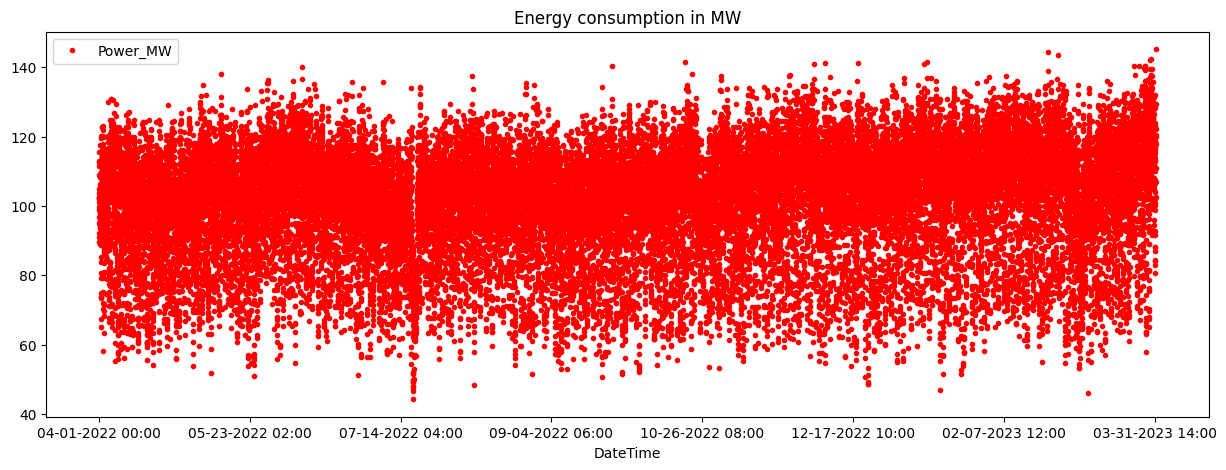

In [76]:
plot1 = df.plot(figsize=(15,5),style='.',color = 'red',title='Energy consumption in MW')

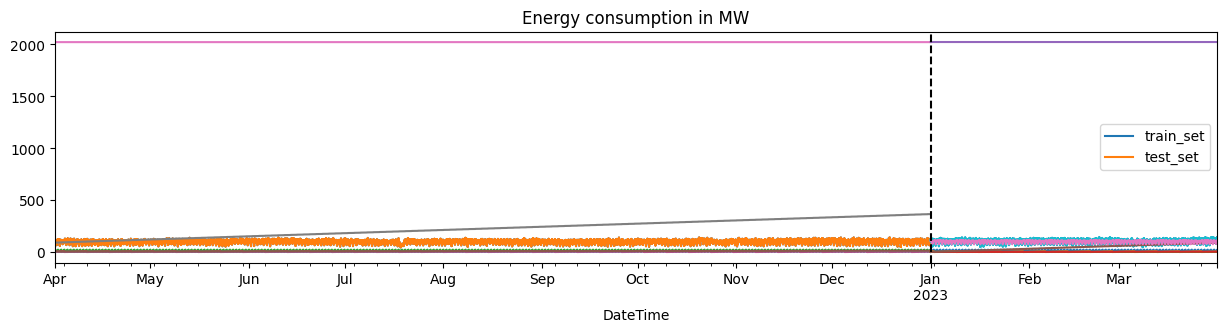

In [148]:
train = df.loc[df.index < '01-01-2023']
test = df.loc[df.index >= '01-01-2023']

ax= df[['Power_MW']].plot(figsize= (15,3))

train.plot(ax=ax,label = 'train_set',title = 'Energy consumption in MW')
test.plot(ax=ax,label = 'test_set')
ax.axvline('01-01-2023',color = 'Black',ls='--')
ax.legend(['train_set','test_set'])
plt.show()

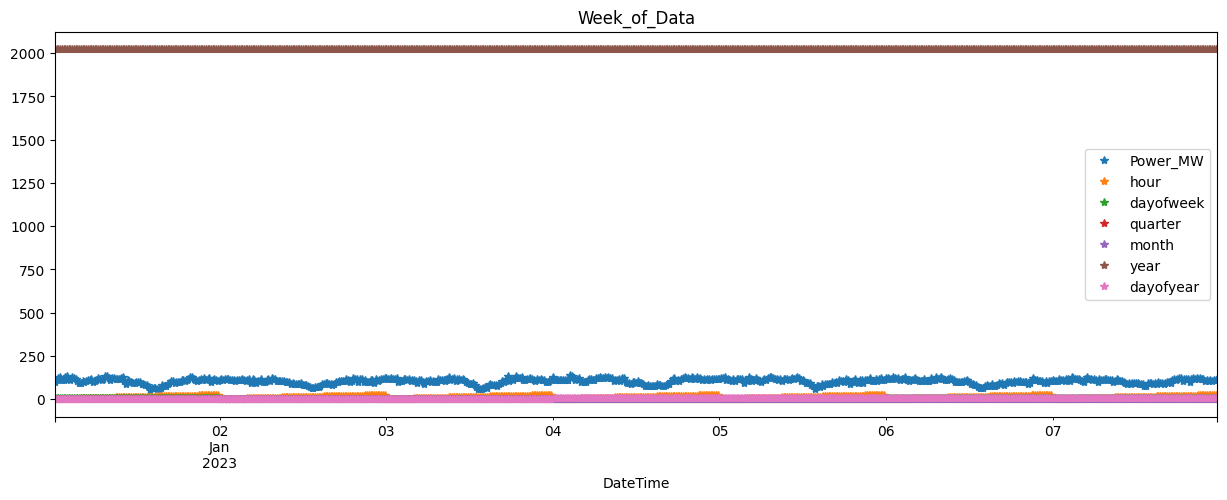

In [107]:
df.loc[(df.index>'01-01-2023') & (df.index<'01-08-2023')].plot(figsize=(15,5),style ='*',title = 'Week_of_Data')
plt.show()

In [105]:
def create_features(df):
    df = df.copy()
    df['hour']=df.index.hour
    df['dayofweek']=df.index.dayofweek
    df['quarter']=df.index.quarter
    df['month']=df.index.month
    df['year']=df.index.year
    df['dayofyear']=df.index.dayofyear
    return df

df = create_features(df)

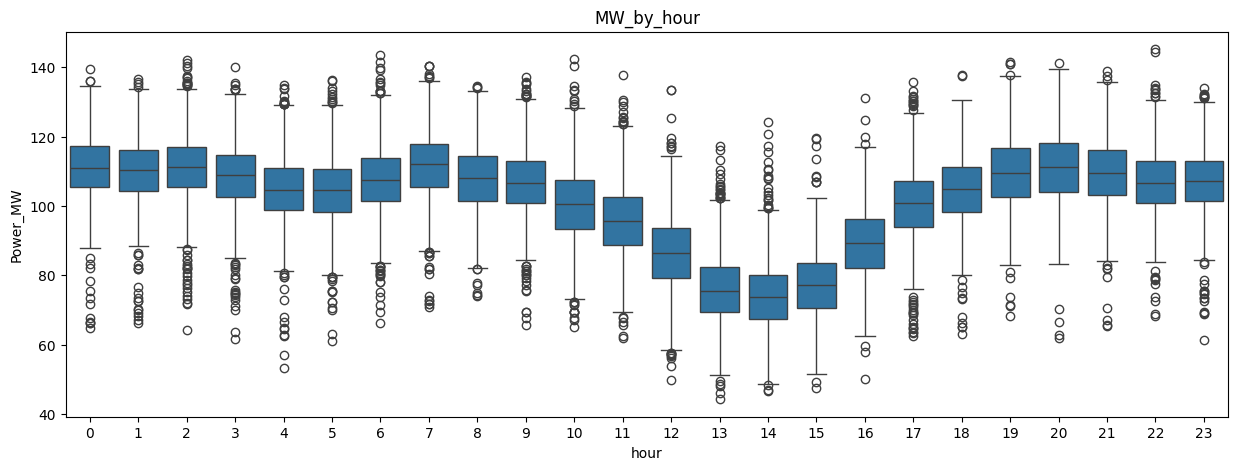

In [94]:
fig, ax = plt.subplots(figsize=(15,5))
sn.boxplot(data=df,x='hour',y='Power_MW')
ax.set_title('MW_by_hour')
plt.show()

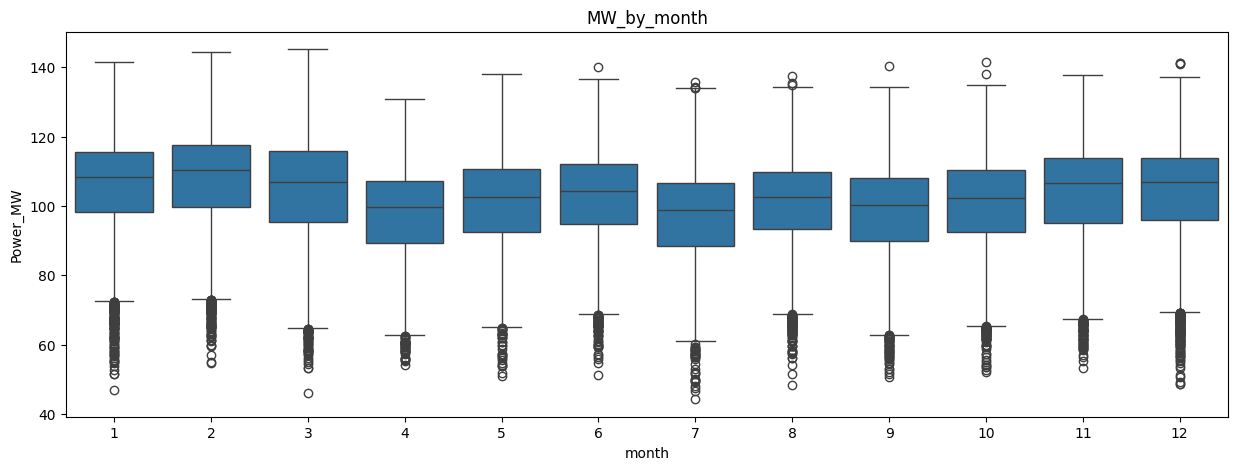

In [95]:
fig, ax = plt.subplots(figsize=(15,5))
sn.boxplot(data=df,x='month',y='Power_MW')
ax.set_title('MW_by_month')
plt.show()

In [96]:
df.columns

Index(['Date', 'Time', 'Power_MW', 'datetime', 'hour', 'dayofweek', 'quarter',
       'month', 'year', 'dayofyear'],
      dtype='object')

In [112]:
train = create_features(train)
test =  create_features(test)

FEATURES = ['hour', 'dayofweek', 'quarter', 'month','year','dayofyear']
TARGET = 'Power_MW'


In [113]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [114]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50)
reg.fit(X_train,y_train,eval_set = [(X_train, y_train), (X_test, y_test)],verbose = True)

[0]	validation_0-rmse:12.28489	validation_1-rmse:14.72995
[1]	validation_0-rmse:10.81111	validation_1-rmse:13.37208
[2]	validation_0-rmse:9.93952	validation_1-rmse:12.73314
[3]	validation_0-rmse:9.45480	validation_1-rmse:12.35547
[4]	validation_0-rmse:9.15488	validation_1-rmse:11.95219
[5]	validation_0-rmse:8.85460	validation_1-rmse:11.92875
[6]	validation_0-rmse:8.68478	validation_1-rmse:11.86942
[7]	validation_0-rmse:8.59256	validation_1-rmse:11.76084
[8]	validation_0-rmse:8.45080	validation_1-rmse:11.60921
[9]	validation_0-rmse:8.37190	validation_1-rmse:11.59658
[10]	validation_0-rmse:8.30236	validation_1-rmse:11.63673
[11]	validation_0-rmse:8.17524	validation_1-rmse:11.52171
[12]	validation_0-rmse:8.11612	validation_1-rmse:11.46203
[13]	validation_0-rmse:8.05885	validation_1-rmse:11.48803
[14]	validation_0-rmse:8.02322	validation_1-rmse:11.46152
[15]	validation_0-rmse:7.97895	validation_1-rmse:11.46005
[16]	validation_0-rmse:7.92342	validation_1-rmse:11.47757
[17]	validation_0-rmse

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [115]:
fi = pd.DataFrame(data = reg.feature_importances_,index = reg.feature_names_in_,columns = ['importance'])

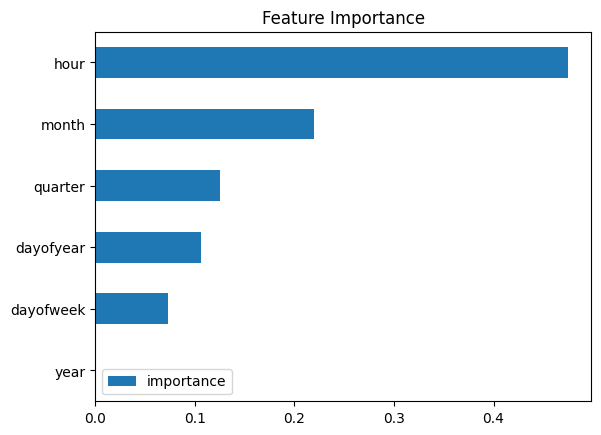

In [116]:
fi.sort_values('importance').plot(kind ='barh', title ='Feature Importance')
plt.show()

In [117]:
#predictions start
test['predictions'] = reg.predict(X_test)

In [118]:
df

,Date,Time,Power_MW,datetime,hour,dayofweek,quarter,month,year,dayofyear
DateTime,,,,,,,,,,
2022-04-01 00:00:00,4-1-2022,00:00,90.93,04-01-2022 00:00,0,4,2,4,2022,91
2022-04-01 00:15:00,4-1-2022,00:15,94.97,04-01-2022 00:15,0,4,2,4,2022,91
2022-04-01 00:30:00,4-1-2022,00:30,108.82,04-01-2022 00:30,0,4,2,4,2022,91
2022-04-01 00:45:00,4-1-2022,00:45,112.58,04-01-2022 00:45,0,4,2,4,2022,91
2022-04-01 01:00:00,4-1-2022,01:00,105.05,04-01-2022 01:00,1,4,2,4,2022,91
...,...,...,...,...,...,...,...,...,...,...
2023-03-31 22:45:00,3-31-2023,22:45,120.56,03-31-2023 22:45,22,4,1,3,2023,90
2023-03-31 23:00:00,3-31-2023,23:00,120.05,03-31-2023 23:00,23,4,1,3,2023,90
2023-03-31 23:15:00,3-31-2023,23:15,110.98,03-31-2023 23:15,23,4,1,3,2023,90


In [119]:
df = df.merge(test[['predictions']],how ='left', left_index =True,right_index = True)

In [120]:
df

,Date,Time,Power_MW,datetime,hour,dayofweek,quarter,month,year,dayofyear,predictions
DateTime,,,,,,,,,,,
2022-04-01 00:00:00,4-1-2022,00:00,90.93,04-01-2022 00:00,0,4,2,4,2022,91,NaN
2022-04-01 00:15:00,4-1-2022,00:15,94.97,04-01-2022 00:15,0,4,2,4,2022,91,NaN
2022-04-01 00:30:00,4-1-2022,00:30,108.82,04-01-2022 00:30,0,4,2,4,2022,91,NaN
2022-04-01 00:45:00,4-1-2022,00:45,112.58,04-01-2022 00:45,0,4,2,4,2022,91,NaN
2022-04-01 01:00:00,4-1-2022,01:00,105.05,04-01-2022 01:00,1,4,2,4,2022,91,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 22:45:00,3-31-2023,22:45,120.56,03-31-2023 22:45,22,4,1,3,2023,90,108.186722
2023-03-31 23:00:00,3-31-2023,23:00,120.05,03-31-2023 23:00,23,4,1,3,2023,90,110.256927
2023-03-31 23:15:00,3-31-2023,23:15,110.98,03-31-2023 23:15,23,4,1,3,2023,90,110.256927


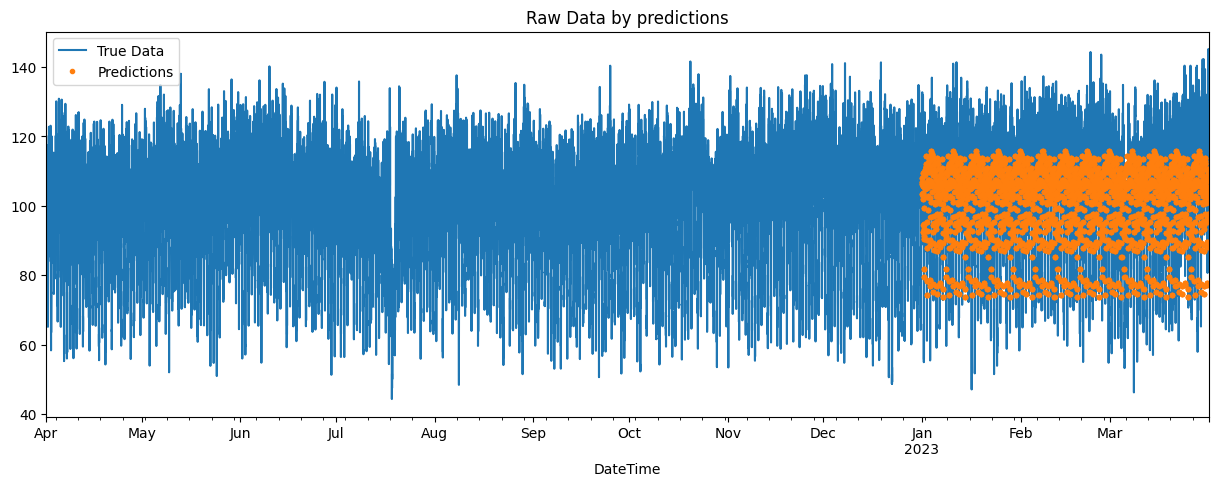

In [121]:
ax = df[['Power_MW']].plot(figsize = (15,5))
df[['predictions']].plot(ax=ax,style='.')
plt.legend(['True Data','Predictions'])
ax.set_title('Raw Data by predictions')
plt.show()

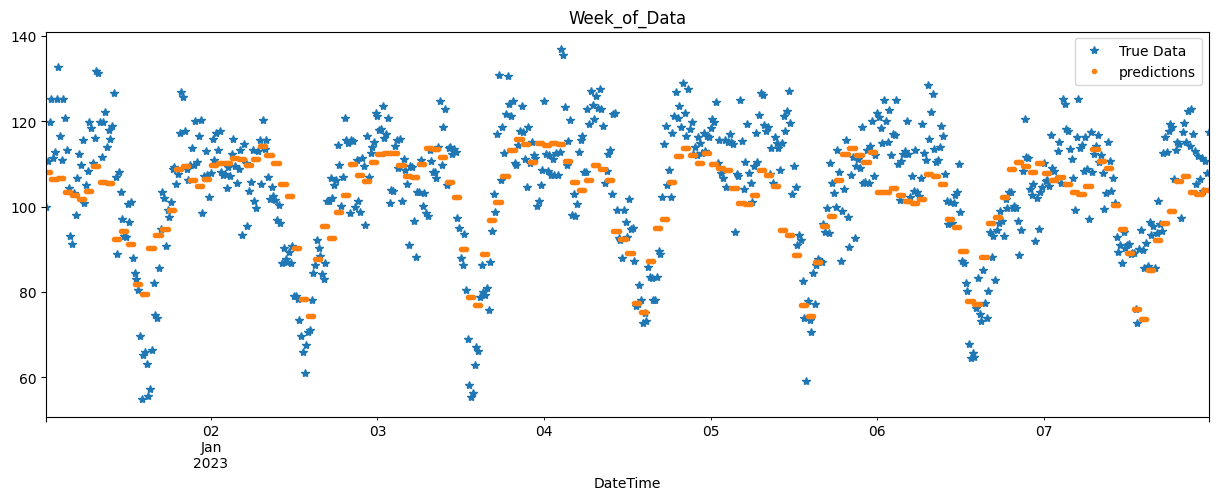

In [127]:
ax = df.loc[(df.index>'01-01-2023') & (df.index<'01-08-2023')]['Power_MW'].plot(figsize=(15,5),style='*',title = 'Week_of_Data')
df.loc[(df.index>'01-01-2023') & (df.index<'01-08-2023')]['predictions'].plot(style ='.')
plt.legend(['True Data','predictions'])
plt.show()

In [130]:
np.sqrt(mean_squared_error(test['Power_MW'],test['predictions']))

11.428341722429023

In [136]:
test['predictions']

DateTime
2023-01-01 00:00:00    108.169815
2023-01-01 00:15:00    108.169815
2023-01-01 00:30:00    108.169815
2023-01-01 00:45:00    108.169815
2023-01-01 01:00:00    106.385902
                          ...    
2023-03-31 22:45:00    108.186722
2023-03-31 23:00:00    110.256927
2023-03-31 23:15:00    110.256927
2023-03-31 23:30:00    110.256927
2023-03-31 23:45:00    110.256927
Name: predictions, Length: 8640, dtype: float32

In [137]:
test[TARGET]-test['predictions']

DateTime
2023-01-01 00:00:00     6.160185
2023-01-01 00:15:00    -8.329815
2023-01-01 00:30:00     2.620185
2023-01-01 00:45:00    11.800185
2023-01-01 01:00:00    18.874098
                         ...    
2023-03-31 22:45:00    12.373278
2023-03-31 23:00:00     9.793073
2023-03-31 23:15:00     0.723073
2023-03-31 23:30:00    -7.566927
2023-03-31 23:45:00    -3.226927
Length: 8640, dtype: float64

In [138]:
np.abs(test[TARGET]-test['predictions'])

DateTime
2023-01-01 00:00:00     6.160185
2023-01-01 00:15:00     8.329815
2023-01-01 00:30:00     2.620185
2023-01-01 00:45:00    11.800185
2023-01-01 01:00:00    18.874098
                         ...    
2023-03-31 22:45:00    12.373278
2023-03-31 23:00:00     9.793073
2023-03-31 23:15:00     0.723073
2023-03-31 23:30:00     7.566927
2023-03-31 23:45:00     3.226927
Length: 8640, dtype: float64

In [140]:
test

,Date,Time,Power_MW,datetime,hour,dayofweek,quarter,month,year,dayofyear,predictions,error,Error
DateTime,,,,,,,,,,,,,
2023-01-01 00:00:00,1-1-2023,00:00,114.33,01-01-2023 00:00,0,6,1,1,2023,1,108.169815,6.160185,6.160185
2023-01-01 00:15:00,1-1-2023,00:15,99.84,01-01-2023 00:15,0,6,1,1,2023,1,108.169815,8.329815,8.329815
2023-01-01 00:30:00,1-1-2023,00:30,110.79,01-01-2023 00:30,0,6,1,1,2023,1,108.169815,2.620185,2.620185
2023-01-01 00:45:00,1-1-2023,00:45,119.97,01-01-2023 00:45,0,6,1,1,2023,1,108.169815,11.800185,11.800185
2023-01-01 01:00:00,1-1-2023,01:00,125.26,01-01-2023 01:00,1,6,1,1,2023,1,106.385902,18.874098,18.874098
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 22:45:00,3-31-2023,22:45,120.56,03-31-2023 22:45,22,4,1,3,2023,90,108.186722,12.373278,12.373278
2023-03-31 23:00:00,3-31-2023,23:00,120.05,03-31-2023 23:00,23,4,1,3,2023,90,110.256927,9.793073,9.793073
2023-03-31 23:15:00,3-31-2023,23:15,110.98,03-31-2023 23:15,23,4,1,3,2023,90,110.256927,0.723073,0.723073


In [144]:
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending = True).head(5)

C:\Users\hp\AppData\Local\Temp\ipykernel_7384\931006502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = test.index.date


date
2023-01-31    6.214741
2023-02-14    6.220466
2023-03-16    6.282139
2023-03-11    6.430135
2023-03-03    6.549326
Name: error, dtype: float64

In [145]:
test.groupby(['date'])['error'].mean().sort_values(ascending = False).head(5)

date
2023-03-30    21.216856
2023-03-06    15.554859
2023-03-05    14.293644
2023-03-31    13.549016
2023-02-11    13.542087
Name: error, dtype: float64